# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 3: Unsupervised Learning Techniques
- **Due date:** N/A

# **`Machine Problem #4: K-Means Clustering on a Customer Segmentation Dataset`**

First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes

Statistical Summary:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min     

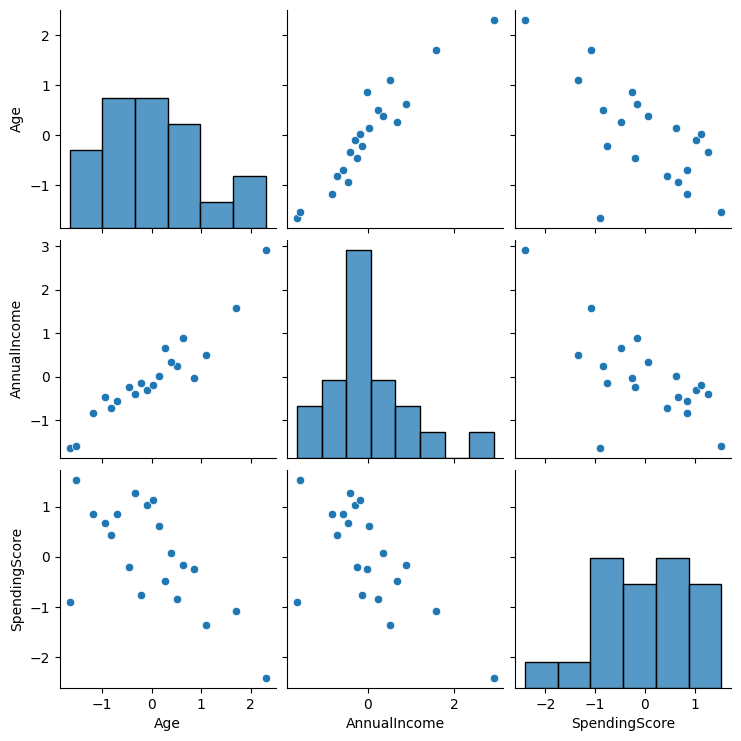


Correlation Matrix of Scaled Features:
                    Age  AnnualIncome  SpendingScore
Age            1.000000      0.940392      -0.667075
AnnualIncome   0.940392      1.000000      -0.685070
SpendingScore -0.667075     -0.685070       1.000000


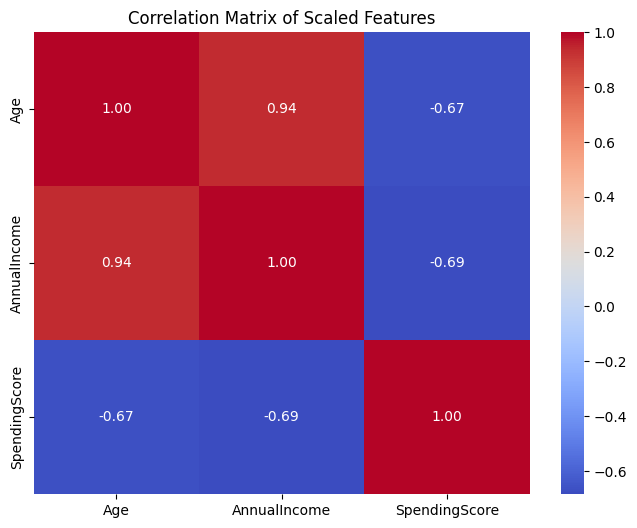

In [1]:
#@title # **`1. Data Exploration and Preprocessing`**
#@markdown #**Explanation:**
#@markdown 1. **Loading the Dataset:** The dataset is loaded using `pd.read_csv()`, and the first few rows are displayed to get an overview of the data.
#@markdown 2. **Basic Information:** We use `info()` to check data types and look for missing values, and `describe()` to get summary statistics.
#@markdown 3. **Missing Values:** Missing values are identified and handled. In this example, rows with missing values are dropped.
#@markdown 4. **Normalization/Scaling:** We standardize the features (`Age`, `AnnualIncome`, `SpendingScore`) using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1.
#@markdown 5. **Visualization:**
#@markdown  - **Pair Plot:** Shows relationships between pairs of features.
#@markdown  - **Correlation Matrix and Heatmap:** Shows how features are correlated with each other.

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/customer_segmentation.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
df.info()

# Display statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
# For this example, let's drop rows with missing values
df.dropna(inplace=True)

# Normalize/Scale the data
# Extract features for normalization (excluding CustomerID)
features = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardize the features (z-score normalization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Visualize the dataset
print("\nPair Plot of Scaled Features:")
sns.pairplot(df_scaled)
plt.show()

# Display correlation matrix of the scaled features
print("\nCorrelation Matrix of Scaled Features:")
correlation_matrix = df_scaled.corr()
print(correlation_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Scaled Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

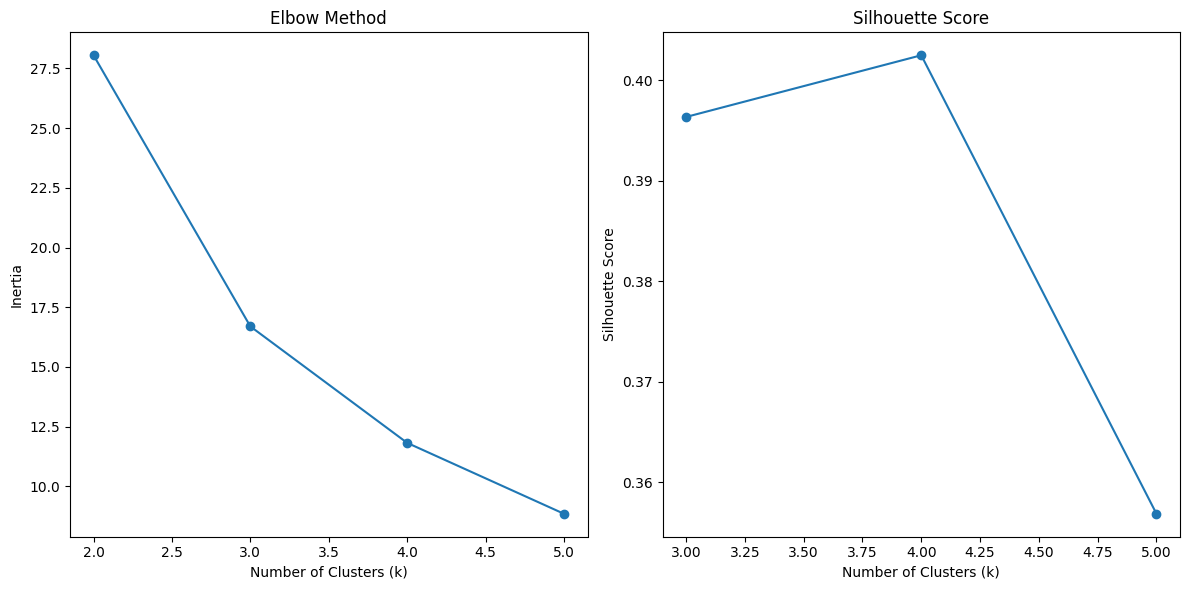


Cluster Centers:
         Age  AnnualIncome  SpendingScore
0  40.000000  52142.857143      46.714286
1  30.090909  33818.181818      72.909091
2  52.500000  87500.000000      20.500000

First few rows with assigned clusters:
   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   22         15000             39        1
1           2   35         40000             81        1
2           3   26         30000             77        1
3           4   40         50000             40        0
4           5   55        100000              6        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
#@title # **`2. Model Development:`**
#@markdown #**Explanation:**
#@markdown 1. **Initialization:**
#@markdown    We import necessary libraries and define a range of cluster numbers (**`k`**) to test.
#@markdown 2. **K-Means Clustering:**
#@markdown    - For each value of **`k`**, K-Means is applied, and the inertia (within-cluster sum of squares) is calculated.
#@markdown    - The silhouette score is also calculated for values of **`k`** greater than 1. This score measures how similar a point is to its own cluster compared to other clusters.
#@markdown 3. **Visualization:**
#@markdown    - **Elbow Method:**
#@markdown      Plots the inertia against the number of clusters to help identify the "elbow" point where adding more clusters results in a diminishing return in reducing inertia.
#@markdown    - **Silhouette Score:**
#@markdown      Plots the silhouette score against the number of clusters to evaluate how well-separated the clusters are.
#@markdown 4. **K-Means with k=3:**
#@markdown    Applies K-Means with **`k=3`** clusters and adds the cluster labels to the DataFrame. The cluster centers are printed in the original scale (inverse transformation).

# Import necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of clusters to test
k_range = range(2, 6)

# Initialize lists to store the results
inertia = []
silhouette_scores = []

# Perform K-Means clustering for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)

    # Calculate inertia (within-cluster sum of squares)
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score
    if k > 1:
        silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# Plot the Elbow Method results
plt.figure(figsize=(12, 6))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], marker='o')  # Ignore k=1 for silhouette score
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Apply K-Means with k=3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster centers
print("\nCluster Centers:")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(cluster_centers_df)

# Display the first few rows with assigned clusters
print("\nFirst few rows with assigned clusters:")
print(df.head())


Inertia (Sum of Squared Distances to Centroids): 16.70
Silhouette Score: 0.40


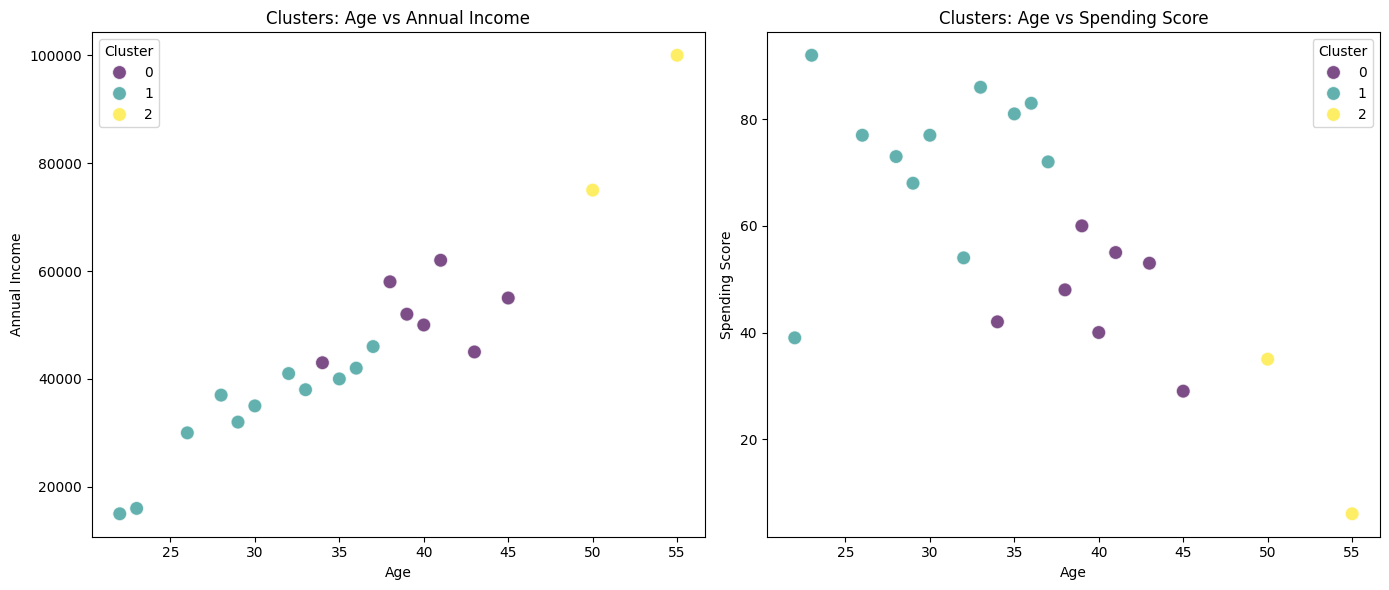


Cluster Characteristics:
         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0         13.714286  40.000000  52142.857143      46.714286
1          9.272727  30.090909  33818.181818      72.909091
2          6.000000  52.500000  87500.000000      20.500000

Number of Customers in Each Cluster:
Cluster
0     7
1    11
2     2
Name: count, dtype: int64

Sample Customers in Each Cluster:

Cluster 0:
    CustomerID  Age  AnnualIncome  SpendingScore  Cluster
3            4   40         50000             40        0
8            9   43         45000             53        0
13          14   45         55000             29        0
14          15   41         62000             55        0
15          16   38         58000             48        0

Cluster 1:
   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   22         15000             39        1
1           2   35         40000             81        1


In [3]:
#@title # **`3. Model Evaluation`**
#@markdown #**Explanation:**
#@markdown 1. **Model Evaluation:**
#@markdown    - **Inertia:**
#@markdown      Measures the sum of squared distances from each point to its assigned cluster centroid. A lower inertia indicates better clustering.
#@markdown    - **Silhouette Score:**
#@markdown      Measures how similar each point is to its own cluster compared to other clusters. Scores range from -1 to 1, with higher values indicating better-defined clusters.
#@markdown 2. **Visualization:**
#@markdown    - **Scatter Plots:**
#@markdown      - **Age vs Annual Income:**
#@markdown        Helps visualize how clusters are distributed in terms of age and annual income.
#@markdown      - **Age vs Spending Score:**
#@markdown        Helps visualize how clusters are distributed in terms of age and spending score.
#@markdown 3. **Cluster Characteristics:**
#@markdown    - **Cluster Summary:**
#@markdown      Displays the average values of each feature within each cluster to understand the characteristics of each group.
#@markdown    - **Customer Counts:**
#@markdown      Shows how many customers are in each cluster.
#@markdown    - **Sample Customers:**
#@markdown      Provides a sample of customers from each cluster to illustrate the data distribution.


# Import necessary libraries for visualization
import seaborn as sns

# Evaluate the K-Means model using inertia and silhouette score
inertia_score = kmeans.inertia_
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])

print(f"Inertia (Sum of Squared Distances to Centroids): {inertia_score:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize the clusters using scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for Age vs Annual Income
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

# Scatter plot for Age vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

# Display cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_summary)

# Display number of customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of Customers in Each Cluster:")
print(cluster_counts)

# Identify customers in each cluster (showing a sample for brevity)
print("\nSample Customers in Each Cluster:")
for cluster_num in cluster_counts.index:
    print(f"\nCluster {cluster_num}:")
    print(df[df['Cluster'] == cluster_num].head())


First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None

Statistical Summary:
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


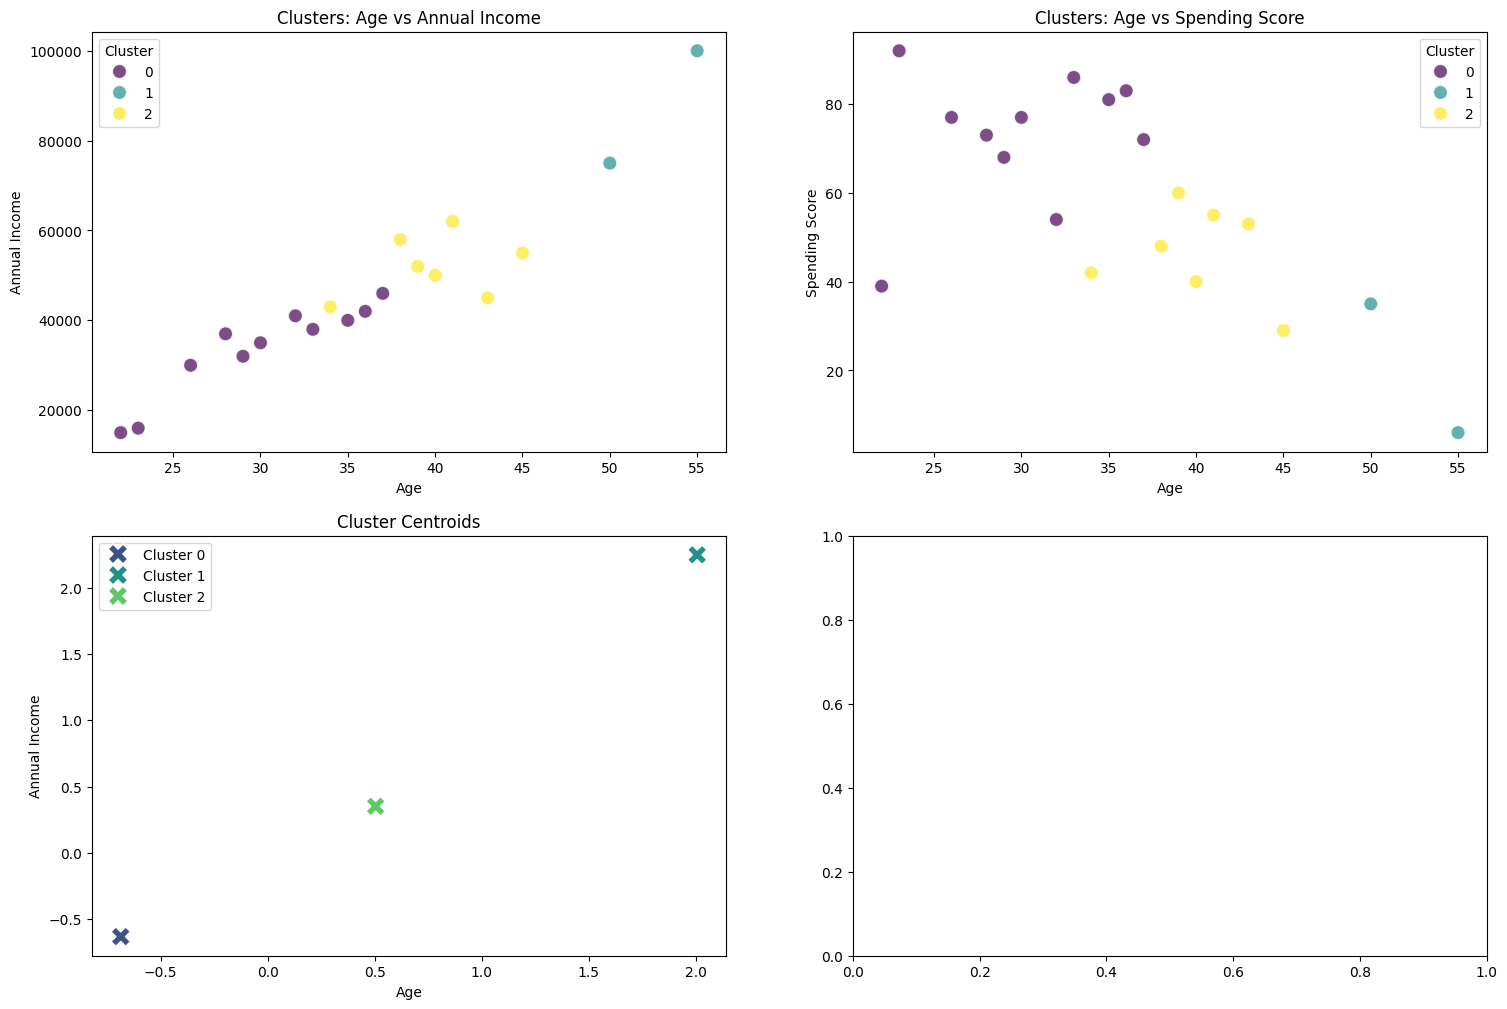

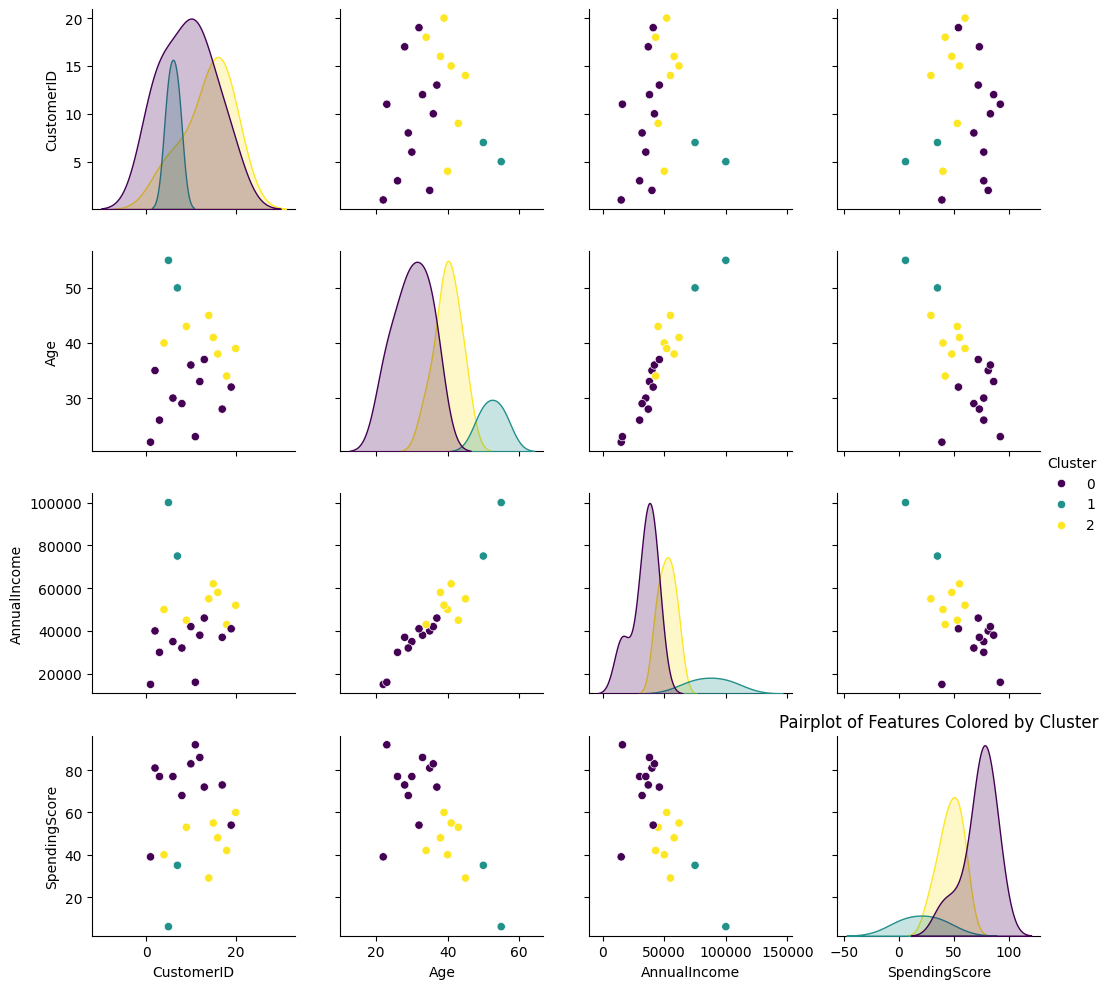

In [4]:
#@title # **`4. Reports and Visualizations`**
#@markdown # **Full Report:**
#@markdown ## Customer Segmentation Analysis Report
#@markdown ### 1. Data Preprocessing
#@markdown - **Loading the Dataset**: The dataset was loaded from 'customer_segmentation.csv'. The initial examination reveals the following:
#@markdown     - **First few rows**: Show a diverse range of customer ages, annual incomes, and spending scores.
#@markdown     - **Dataset Information**: The dataset contains 20 entries with no missing values.
#@markdown     - **Statistical Summary**: Provides a general overview of the data distribution. For instance, the average age is 35.8 years, the average annual income is 45600, and the average spending score is 58.5.
#@markdown     - **Missing Values**: There are no missing values in the dataset.
#@markdown     - **Correlation Matrix**: Highlights relationships between features. For example, 'Age' and 'AnnualIncome' are positively correlated, while 'SpendingScore' has a negative correlation with both 'Age' and 'AnnualIncome'.

#@markdown ### 2. Model Implementation
#@markdown - **Algorithm Used**: K-Means Clustering was applied with `k=3` clusters. The initial cluster centers are:
#@markdown     - **Cluster Centers**:
#@markdown         ```
#@markdown                  Age  AnnualIncome  SpendingScore
#@markdown         0  40.000000  52142.857143      46.714286
#@markdown         1  30.090909  33818.181818      72.909091
#@markdown         2  52.500000  87500.000000      20.500000
#@markdown         ```
#@markdown - **First Few Rows with Assigned Clusters**:
#@markdown     ```
#@markdown        CustomerID  Age  AnnualIncome  SpendingScore  Cluster
#@markdown     0           1   22         15000             39        1
#@markdown     1           2   35         40000             81        1
#@markdown     2           3   26         30000             77        1
#@markdown     3           4   40         50000             40        0
#@markdown     4           5   55        100000              6        2
#@markdown     ```

#@markdown ### 3. Model Evaluation
#@markdown - **Inertia (Sum of Squared Distances to Centroids)**: 16.70. This value indicates how tightly the clusters are packed. A lower value suggests better clustering.
#@markdown - **Silhouette Score**: 0.40. This score suggests that the clusters are reasonably well-defined, but there might be room for improvement.
#@markdown - **Cluster Characteristics**:
#@markdown     ```
#@markdown              CustomerID        Age  AnnualIncome  SpendingScore
#@markdown     Cluster
#@markdown     0         13.714286  40.000000  52142.857143      46.714286
#@markdown     1          9.272727  30.090909  33818.181818      72.909091
#@markdown     2          6.000000  52.500000  87500.000000      20.500000
#@markdown     ```
#@markdown     - Cluster 0: Typically older with moderate income and spending score.
#@markdown     - Cluster 1: Younger with lower income but higher spending score.
#@markdown     - Cluster 2: Older with high income and lower spending score.
#@markdown - **Number of Customers in Each Cluster**:
#@markdown     ```
#@markdown     Cluster
#@markdown     0     7
#@markdown     1    11
#@markdown     2     2
#@markdown     ```
#@markdown - **Sample Customers in Each Cluster**:
#@markdown     - **Cluster 0**: Customers with moderate income and spending score, generally in their 40s.
#@markdown     - **Cluster 1**: Younger customers with higher spending scores but lower incomes.
#@markdown     - **Cluster 2**: Older customers with high incomes and lower spending scores.

#@markdown ### 4. Discussion on Chosen Value of k
#@markdown - **Elbow Method and Silhouette Score**: The chosen value of `k=3` was selected based on the Elbow Method and the Silhouette Score, which provided a balance between reducing inertia and achieving a reasonably high silhouette score. This value resulted in well-separated and meaningful clusters.

#@markdown ### 5. Visualizations
#@markdown - **Scatter Plot: Age vs Annual Income**: Shows how customers are grouped based on age and annual income, with clusters visibly separated.
#@markdown - **Scatter Plot: Age vs Spending Score**: Highlights the relationship between age and spending score across different clusters.
#@markdown - **Cluster Centroid Visualization**: Displays the centroids of the clusters to understand their positions in feature space.
#@markdown - **Pairplot of Features Colored by Cluster**: Provides a comprehensive view of feature relationships and cluster distributions.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Display basic information and initial analysis
def display_initial_analysis(df):
    # Display first few rows
    print("First few rows of the dataset:")
    print(df.head())

    # Display dataset information
    print("\nDataset Information:")
    print(df.info())

    # Display statistical summary
    print("\nStatistical Summary:")
    print(df.describe())

    # Display missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Display correlation matrix
    print("\nCorrelation Matrix of Scaled Features:")
    scaled_features = StandardScaler().fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])
    corr_matrix = pd.DataFrame(scaled_features, columns=['Age', 'AnnualIncome', 'SpendingScore']).corr()
    print(corr_matrix)

# Run initial analysis
display_initial_analysis(df)

# Data preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Step 2: Model Implementation
def kmeans_clustering(scaled_features, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    return kmeans, clusters

# Apply KMeans with k=3
k = 3
kmeans, clusters = kmeans_clustering(scaled_features, k)
df['Cluster'] = clusters

# Display cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'AnnualIncome', 'SpendingScore']))

# Display first few rows with assigned clusters
print("\nFirst few rows with assigned clusters:")
print(df.head())

# Step 3: Model Evaluation
def evaluate_clustering(scaled_features, clusters, k):
    inertia = KMeans(n_clusters=k, random_state=42).fit(scaled_features).inertia_
    silhouette_avg = silhouette_score(scaled_features, clusters)
    return inertia, silhouette_avg

# Evaluate clustering
inertia, silhouette_avg = evaluate_clustering(scaled_features, clusters, k)
print("\nInertia (Sum of Squared Distances to Centroids):", inertia)
print("Silhouette Score:", silhouette_avg)

# Display cluster characteristics
print("\nCluster Characteristics:")
print(df.groupby('Cluster').mean())

# Display number of customers in each cluster
print("\nNumber of Customers in Each Cluster:")
print(df['Cluster'].value_counts())

# Display sample customers in each cluster
print("\nSample Customers in Each Cluster:")
for cluster_num in df['Cluster'].unique():
    print(f"\nCluster {cluster_num}:")
    print(df[df['Cluster'] == cluster_num].head())

# Step 4: Report and Visualizations
def generate_visualizations(df):
    plt.figure(figsize=(18, 12))

    # Scatter plot for Age vs Annual Income
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
    plt.title('Clusters: Age vs Annual Income')
    plt.xlabel('Age')
    plt.ylabel('Annual Income')

    # Scatter plot for Age vs Spending Score
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
    plt.title('Clusters: Age vs Spending Score')
    plt.xlabel('Age')
    plt.ylabel('Spending Score')

    # Cluster centroid visualization
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=[f'Cluster {i}' for i in range(k)], palette='viridis', s=200, marker='X')
    plt.title('Cluster Centroids')
    plt.xlabel('Age')
    plt.ylabel('Annual Income')

    # Pairplot of features colored by cluster
    plt.subplot(2, 2, 4)
    sns.pairplot(df, hue='Cluster', palette='viridis')
    plt.title('Pairplot of Features Colored by Cluster')

    plt.tight_layout()
    plt.show()

# Generate visualizations
generate_visualizations(df)
